In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from matplotlib import pyplot
import math

In [29]:
def dendrite_membrane(state, t):
    v = state[0] # voltage state vector
    n = state[1] # activation variable for potassium channel state vector
    m = state[2] # activation variable for sodium channel state vector
    h = state[3] # inactivation variable for sodium channel state vector
        
    # Set active (hh) properties
    # General parameters
    R_a = 212.47 # (ohm-cm) axial resistance
    C_m = 0.77 # (µF/cm^2) membrane capacitance
    SA = 10,000 # (µm^2) total surface area (Gouwens reports 7343, 8308, and 10238 for dendrites)
    
    # Set nernst reversal potentials
    e_Na = 48 # (mV) nernst reversal potential of sodium current
    e_K = -90 # (mV) nernst reversal potential of potassium current (-80 in Gunay)

    # Set channel conductances
    gbar_Na = 120 # (µS/cm^2) maximum sodium channel conductance 
    g_Na = gbar_Na * h * m**3 # (µS/cm^2) sodium channel conductance
    gbar_K = 36 # (µS/cm^2) maximum potassium channel conductance 
    g_K = gbar_K * (n**4) # (µS/cm^2) potassium channel conductance

    # Set currents
    I_Na = g_Na * (v-e_Na) # (µA) sodium current
    I_K = g_K * (v-e_K) # (µA) potassium current
    # I_app = 10 # (µA) applied current

    # Channel Gating Kinetics for Potassium (K) channel n
    # n is the activation variable for the Potassium (K) Channel
    # Potassium channel does not inactivate, so there is no inactivation variable
    a_n = 0.01*(10-v)/(np.exp((10-v)/10)-1)
    b_n = 0.125*np.exp(-v/80)

    # Channel Gating Kinetics for Sodium (Na) Channel m
    # m is the activation variable for the Sodium (Na) Channel
    a_m = 0.1*(25-v)/(np.exp((25-v)/10)-1)
    b_m = 4*np.exp(-v/18)

    # Channel Gating Kinetics for Sodium (Na) Channel h
    # h is the inactivation variable for the Sodium (Na) Channel
    b_h = 1/(np.exp((30-v)/10)+1)    #should be +1?
    a_h = 0.07*np.exp(-v/20)

    # External current
    # step up 10 uA/cm^2 every 100ms for 400ms
    I_inj = 10*(t>100) -10*(t>200) + 35*(t>300)
    # return 10*t

    # Differential Equations
    dvdt = (-I_Na - I_K + I_inj)/C_m
    dndt = a_n*(1-n) - b_n*n
    dmdt = a_m*(1-m) - b_m*m
    dhdt = a_h*(1-h) - b_h*h

    return dvdt, dndt, dmdt, dhdt

In [30]:
def axon_membrane(state,t):
    v = state[0] # voltage state vector
    n = state[1] # activation variable for potassium channel state vector
    m = state[2] # activation variable for sodium channel state vector
    h = state[3] # inactivation variable for sodium channel state vector
        
    # Set passive (leak) properties
    # General parameters
    R_a = 212.47 # (ohm-cm) axial resistance
    C_m = 0.77 # (µF/cm^2) membrane capacitance
    SA = 10,000 # (µm^2) total surface area (Gouwens reports 7343, 8308, and 10238 for dendrites)
   
    e_L = -55 # (mV) nernst reversal potential of the leak current
    gbar_L = 0.0328 # (µS/cm^2) maximum leakage channel conductance
    I_L = gbar_L * (v - e_L) # (µA) leak current
    g_pas = 3.5e-5 # (S/cm^2) passive conductance
    
    # Channel Gating Kinetics for Potassium (K) channel n
    # n is the activation variable for the Potassium (K) Channel
    # Potassium channel does not inactivate, so there is no inactivation variable
    a_n = 0.01*(10-v)/(np.exp((10-v)/10)-1)
    b_n = 0.125*np.exp(-v/80)

    # Channel Gating Kinetics for Sodium (Na) Channel m
    # m is the activation variable for the Sodium (Na) Channel
    a_m = 0.1*(25-v)/(np.exp((25-v)/10)-1)
    b_m = 4*np.exp(-v/18)

    # Channel Gating Kinetics for Sodium (Na) Channel h
    # h is the inactivation variable for the Sodium (Na) Channel
    b_h = 1/(np.exp((30-v)/10)+1)    #should be +1?
    a_h = 0.07*np.exp(-v/20)

    # Differential Equations
    dvdt = (I_L)/C_m
    dndt = a_n*(1-n) - b_n*n
    dmdt = a_m*(1-m) - b_m*m
    dhdt = a_h*(1-h) - b_h*h

    return dvdt, dndt, dmdt, dhdt

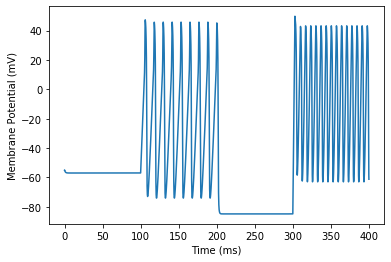

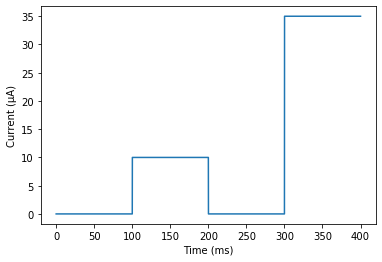

In [31]:
# Plot action potential response for dendrite membrane
t = np.arange(0,400,.001)
state0 = [-55, 0.19, 0.18, 0.28]
state = odeint(dendrite_membrane, state0, t)
plt.plot(t,state[:,0])
pyplot.xlabel('Time (ms)')
pyplot.ylabel('Membrane Potential (mV)')
plt.show()

I_inj = 10*(t>100) - 10*(t>200) + 35*(t>300)
plt.plot(t,I_inj)
pyplot.xlabel('Time (ms)')
pyplot.ylabel('Current (μA)')
plt.show()

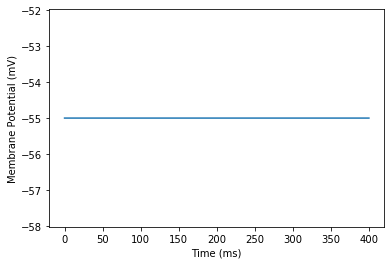

In [32]:
# Plot action potential response for axon membrane
t = np.arange(0,400,.001)
state0 = [-55, 0.19, 0.18, 0.28]
state = odeint(axon_membrane, state0, t)
plt.plot(t,state[:,0])
pyplot.xlabel('Time (ms)')
pyplot.ylabel('Membrane Potential (mV)')
plt.show()

C:\Users\hudso\anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


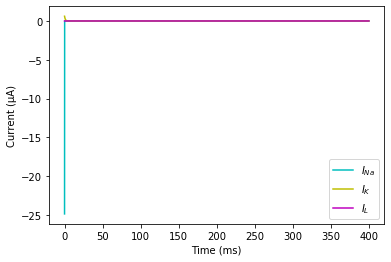

In [33]:
# Plot channel currents
gbar_Na = 120
g_Na = gbar_Na * state[:,3] * state[:,2]**3
# plt.plot(t, g_Na)
I_Na = g_Na * (state[:,0]-72)
plt.plot(t, I_Na, 'c', label='$I_{Na}$')

gbar_K = 36 # 
g_K = gbar_K * (state[:,1]**4) 
# plt.plot(t, g_K)
I_K = g_K * (+state[:,0]+68)
plt.plot(t, I_K, 'y', label='$I_{K}$')

gbar_L = 0.0328
I_L = gbar_L * (state[:,0]+55)
I_inj = 10*(t>100) - 10*(t>200) + 35*(t>300)
# plt.plot(t, gbar_L)
plt.plot(t, I_L, 'm', label = '$I_{L}$')

pyplot.xlabel('Time (ms)')
pyplot.ylabel('Current (μA)')

plt.legend()
plt.show()

C:\Users\hudso\anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


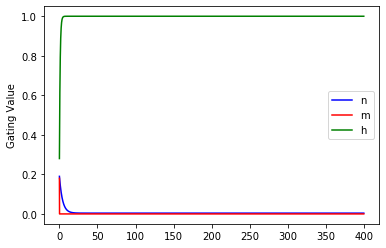

In [34]:
# Plot gating variables
plt.plot(t, state[:,1], 'b', label='n') # activation variable for K channel (n): blue
plt.plot(t, state[:,2], 'r', label='m') # activation variable for Na channel (m): red
plt.plot(t, state[:,3], 'g', label='h') # inactivation variable for Na channel (h): green
plt.ylabel('Gating Value')
plt.legend()

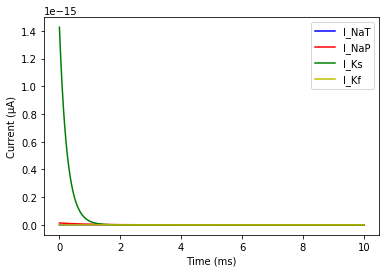

In [36]:
'''
    New parameters to consider from Gunay's (2015) paper
    I_Na_T = -29.13 # mA (transient Na+ current)
    g_Na_T = 100 nS (30 # mS/cm^2) (transient Na+ current conductance)
    I_Na_P = -48.77 # mA (persistent Na+ current)
    g_Na_P = 0.8 nS (0.1 # μS/cm^2) (persistent Na+ current conductance)
    I_K_s = -12.85 # mA (slow K+ current)
    g_Ks = 50 # nS (slow K+ current conductance)
    G_Ks = 30 # μS/cm^2 (slow K+ current channel density)
    I_K_f = -17.55 # mA (fast K+ current) 
    g_Kf = 24.1 # nS (fast K+ current conductance)

    Edited parameters from Marley's and Baines' (2011) paper
    I_Na_T = -24.1 +/- 2.7 # pA (transient Na+ current)
    g_Na_T = 100 # nS (transient Na+ current conductance)
    I_Na_P = -24.6 +/- 0.4 # pA (persistent Na+ current)
    g_Na_P = 0.8 # nS (persistent Na+ current conductance)
    I_K_s = 64.0 +/- 5.5 # pA (slow K+ current)
    g_K_s = 50 # nS (slow K+ current conductance)
    G_K_s = 30 # μS/cm2 (slow K+ current channel density)
    I_K_f = 84.1 +/- 5.9 # pA (fast K+ current) 
    g_K_f = 24.1 # nS (fast K+ current conductance)
'''

# Plot additional currents
start = 0
stop = 10
V_m = np.arange(start, stop, 0.001)
t = np.arange(start, stop, 0.001)
    
# Define nernst reversal potentials
e_Na = 48 # (mV) nernst reversal potential of sodium current
e_K = -90 # (mV) nernst reversal potential of potassium current (-80 in Gunay)

# Define maximal channel conductances
gbar_Na = 120 # (µS/cm^2) maximum sodium channel conductance 
gbar_K = 36 # (µS/cm^2) maximum potassium channel conductance 

# Define voltage-dependent steady state
x_Inf_NaT_A =  1/(1 + np.exp(V_m + 29.13)/-8.92)
x_Inf_NaT_I = 1/(1 + np.exp(V_m + 47)/5)
x_Inf_NaP = 1/(1 + np.exp(V_m + 48.77)/-3.68)
x_Inf_Ks = 1/(1 + np.exp(V_m + 12.85)/-19.91)
x_Inf_Kf_A = 1/(1 + np.exp(V_m + 17.55)/-7.27)
x_Inf_Kf_I = 1/(1 + np.exp(V_m + 45)/6)

# Define time constants
tau_NaT_A = 0.13 + (3.43/(1 + ((V_m + 45.35)/5.98)**3))
tau_NaT_I = 0.36 + (((V_m + 20.65)/10.47)**3)
tau_NaP = 1
tau_Ks = 2.03 + (1.96/(1 + ((V_m - 29.83)/3.32)**4))
tau_Kf_A = 1.94 + 2.66/(1 + ((V_m - 8.12)/7.96)**4)
tau_Kf_I = 1.79 + 515.8/(1 + ((V_m + 174.4)/28.66)**4)

# Define mechanism for m and h equations
dxdt_NaT_A = (x_Inf_NaT_A)/tau_NaT_A
dxdt_NaT_I = (x_Inf_NaT_I)/tau_NaT_I
dxdt_NaP = (x_Inf_NaP)/tau_NaP
dxdt_Ks = (x_Inf_Ks)/tau_Ks
dxdt_Kf_A = (x_Inf_Kf_A)/tau_Kf_A
dxdt_Kf_I = (x_Inf_Kf_I)/tau_Kf_I

# Define channel currents
I_NaT = gbar_Na * (dxdt_NaT_A**3) * dxdt_NaT_I * (V_m - e_Na)
I_NaP = gbar_Na * (dxdt_NaP**1) * (V_m - e_Na)
I_Ks = gbar_K * (dxdt_Ks**4) * (V_m - e_K)
I_Kf = gbar_K * (dxdt_Kf_A**4) * dxdt_Kf_I * (V_m - e_K)

plt.plot(t, I_NaT, 'b', label = 'I_NaT')
plt.plot(t, I_NaP, 'r', label = 'I_NaP')
plt.plot(t, I_Ks, 'g', label = 'I_Ks')
plt.plot(t, I_Kf, 'y', label = 'I_Kf')

pyplot.xlabel('Time (ms)')
pyplot.ylabel('Current (μA)')

plt.legend()
plt.show()